# Terceira Prova

# Questão 1

Resolva o problema de transbordo abaixo utilizando a linguagem `Julia`.

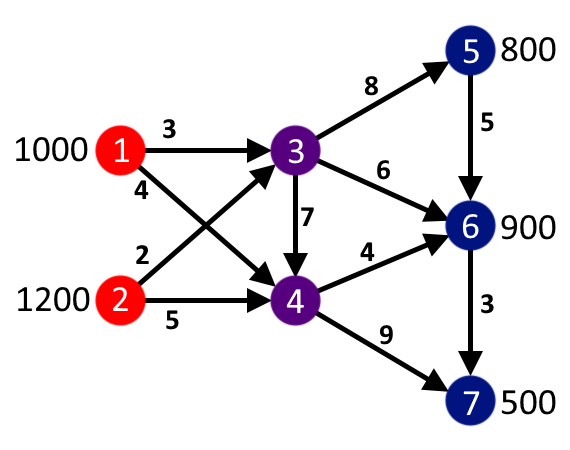

*Solução:*

In [1]:
# Bibliotecas a serem usadas
using JuMP, GLPK

In [2]:
# Número de nós e suas capacidades e demandas
nodes = 1:7
b = [-1000, -1200, 0, 0, 800, 900, 500]

# Nós iniciais e finais dos arcos
start_node = [1,1, 2,2, 3,3,3, 4,4, 5, 6]
end_node = [3,4, 3,4, 4,5,6, 6,7, 6, 7]

# Custos associados aos arcos
c = [3,4, 2,5, 7,8,6, 4,9, 5, 3]

# Arcos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(end_node) )
c_dict = Dict(links .=> c)

links

((1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (4, 7), (5, 6), (6, 7))

In [3]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis
@variable(model, x[link in links]>=0)

# Função Objetivo
@objective(model, Min, sum(c_dict[link] * x[link] for link in links))

# Restrições
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == b[i])
end

# Descrição do modelo
println(model)

Min 3 x[(1, 3)] + 4 x[(1, 4)] + 2 x[(2, 3)] + 5 x[(2, 4)] + 7 x[(3, 4)] + 8 x[(3, 5)] + 6 x[(3, 6)] + 4 x[(4, 6)] + 9 x[(4, 7)] + 5 x[(5, 6)] + 3 x[(6, 7)]
Subject to
 -x[(1, 3)] - x[(1, 4)] == -1000
 -x[(2, 3)] - x[(2, 4)] == -1200
 x[(1, 3)] + x[(2, 3)] - x[(3, 4)] - x[(3, 5)] - x[(3, 6)] == 0
 x[(1, 4)] + x[(2, 4)] + x[(3, 4)] - x[(4, 6)] - x[(4, 7)] == 0
 x[(3, 5)] - x[(5, 6)] == 800
 x[(3, 6)] + x[(4, 6)] + x[(5, 6)] - x[(6, 7)] == 900
 x[(4, 7)] + x[(6, 7)] == 500
 x[(1, 3)] >= 0
 x[(1, 4)] >= 0
 x[(2, 3)] >= 0
 x[(2, 4)] >= 0
 x[(3, 4)] >= 0
 x[(3, 5)] >= 0
 x[(3, 6)] >= 0
 x[(4, 6)] >= 0
 x[(4, 7)] >= 0
 x[(5, 6)] >= 0
 x[(6, 7)] >= 0



In [4]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Valor ótimo
println("FO=", obj)

# Solução ótima
for link in links
  println("x(",link,")= ",value(x[link]))
end

FO=20700.0
x((1, 3))= 0.0
x((1, 4))= 1000.0
x((2, 3))= 1200.0
x((2, 4))= 0.0
x((3, 4))= 0.0
x((3, 5))= 800.0
x((3, 6))= 400.0
x((4, 6))= 1000.0
x((4, 7))= 0.0
x((5, 6))= 0.0
x((6, 7))= 500.0


Ou seja, a solução ótima é:

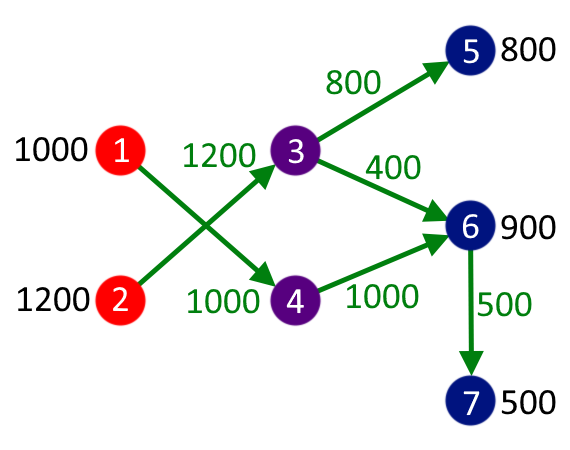

# Questão 2

Dada a rede a seguir encontre o caminho crítico, a data mais cedo e a data mais tarde de início das atividades.

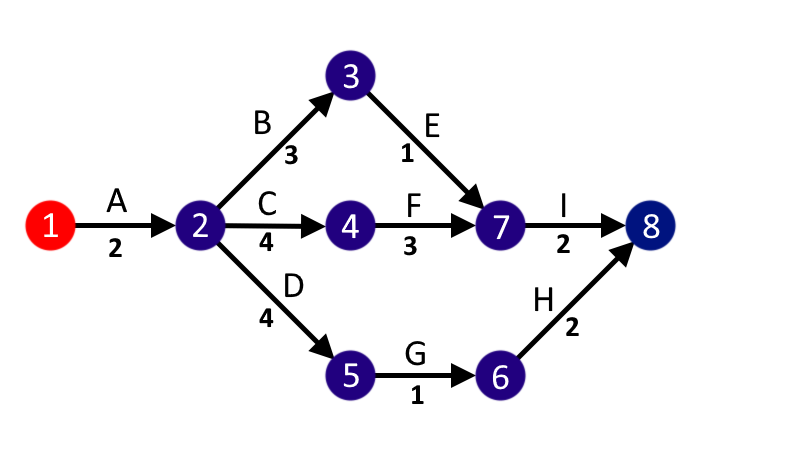

*Solução:*

Teremos que:

| Atividades | Precedência | Duração | DCI | DCT | DTI | DTT | Folga |
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| A | ---- | 2 | 0 |  2 | 0 | 2 | 0 |
| B |    A | 3 | 2 |  5 | 5 | 8 | 3 |
| C |    A | 4 | 2 |  6 | 2 | 6 | 0 |
| D |    A | 4 | 2 |  6 | 5 | 9 | 3 |
| E |    B | 1 | 5 |  6 | 8 | 9 | 3 |
| F |    C | 3 | 6 |  9 | 6 | 9 | 0 |
| G |    D | 1 | 6 |  7 | 8 |  9 | 2 |
| H |    G | 2 | 7 |  9 | 9 | 11 | 2 |
| I | E, F | 2 | 9 | 11 | 9 | 11 | 0 |

Então, teremos que o conjunto das atividades tem duração de 11 unidades de tempo, e o caminho crítico é $A-C-F-I.$ 

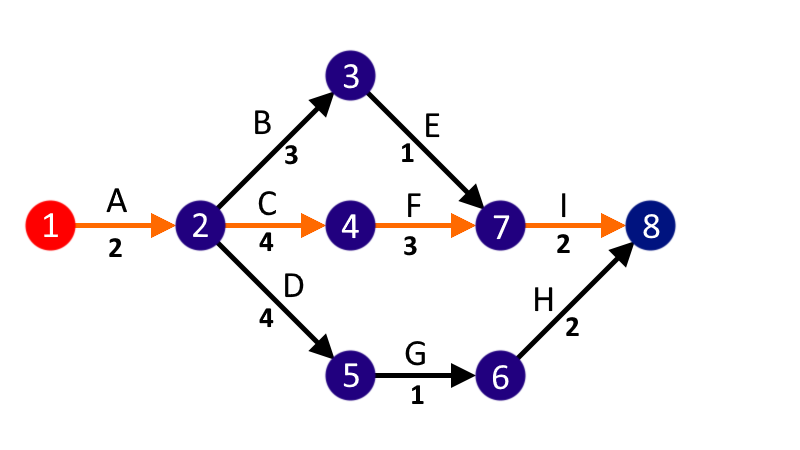

O caminho crítico e a duração do projeto também podem ser obtidos usando `Julia`:

In [5]:
# Número de nós e seus tipos
nodes = 1:8
b=[-1,0,0,0,0,0,0,1]

# Inícios e fins dos 9 arcos
start_node = [1,2,2,2,3,4,5,6,7]
end_node = [2,3,4,5,7,7,6,8,8]

# Custos associados aos arcos
c=[2,3,4,4,1,3,1,2,2]

# Caminhos
links = Tuple( (start_node[i], end_node[i]) for i in 1:length(start_node) )
c_dict = Dict(links .=> c)

links

((1, 2), (2, 3), (2, 4), (2, 5), (3, 7), (4, 7), (5, 6), (6, 8), (7, 8))

In [6]:
# Modelo
model = Model(GLPK.Optimizer)

# Variáveis (caminhos)
@variable(model, 0<= x[link in links])

# Função objetivo 
@objective(model, Max, sum(c_dict[link] * x[link] for link in links))

# Custos dos caminhos
for i in nodes
   @constraint(model, -sum(x[(ii,j)] for (ii,j) in links if ii==i)
                   + sum(x[(j,ii)] for (j,ii) in links if ii==i) == b[i])
end

# Descrição do modelo
println(model)

Max 2 x[(1, 2)] + 3 x[(2, 3)] + 4 x[(2, 4)] + 4 x[(2, 5)] + x[(3, 7)] + 3 x[(4, 7)] + x[(5, 6)] + 2 x[(6, 8)] + 2 x[(7, 8)]
Subject to
 -x[(1, 2)] == -1
 x[(1, 2)] - x[(2, 3)] - x[(2, 4)] - x[(2, 5)] == 0
 x[(2, 3)] - x[(3, 7)] == 0
 x[(2, 4)] - x[(4, 7)] == 0
 x[(2, 5)] - x[(5, 6)] == 0
 x[(5, 6)] - x[(6, 8)] == 0
 x[(3, 7)] + x[(4, 7)] - x[(7, 8)] == 0
 x[(6, 8)] + x[(7, 8)] == 1
 x[(1, 2)] >= 0
 x[(2, 3)] >= 0
 x[(2, 4)] >= 0
 x[(2, 5)] >= 0
 x[(3, 7)] >= 0
 x[(4, 7)] >= 0
 x[(5, 6)] >= 0
 x[(6, 8)] >= 0
 x[(7, 8)] >= 0



In [7]:
# Otimização do modelo
JuMP.optimize!(model)
obj = JuMP.objective_value(model)

# Custo máximo
println("Função Objetivo: FO=", obj)

# Caminho do custo máximo
for link in links
  println("Valor de x",link," = ",value(x[link]))
end

Função Objetivo: FO=11.0
Valor de x(1, 2) = 1.0
Valor de x(2, 3) = 0.0
Valor de x(2, 4) = 1.0
Valor de x(2, 5) = 0.0
Valor de x(3, 7) = 0.0
Valor de x(4, 7) = 1.0
Valor de x(5, 6) = 0.0
Valor de x(6, 8) = 0.0
Valor de x(7, 8) = 1.0


# Questão 3

(Fila $M/M/1$) Numa pastelaria há apenas uma atendente. O modelo de chegada de clientes segue uma distribuição de Poisson com taxa média de chegada de 10 pessoas por hora. Os clientes são atendidos segundo a disciplina **FIFO** (*First in first out*). O tempo médio gasto para atender um cliente é estimado como sendo exponencialmente distribuído como um tempo médio de 4 minutos. Determine:

### a) A probabilidade de formar uma fila.

*Solução:*

Para um modelo de fila $M/M/1$ com taxa de chegada $\lambda$ e taxa de saída $\mu$, temos que a intensidade do tráfego é $\rho=\lambda/\mu$ e a probabilidade do número $N$ de pessoas no sistema (em fila e em atendimento) ser maior ou igual a $n$ é $P(N \ge n)=\rho^n$. Usando os dados:

Taxa de chegada: $\lambda = 10$ pessoas por hora.  
Taxa de serviço: $\mu=1/(4/60)= 15$ pessoas por hora.  
Intensidade do tráfego: $\rho= (10/15)=2/3$  
$\implies$ Probabilidade de fila (número de clientes maior que o núemro de atendentes): $P(N \ge 2) = (2/3)^2=0,4444$  

### b. O comprimento médio da fila.

*Solução:*

Para um modelo de fila $M/M/1$ com intensidade de tráfego $\rho$, o número $K$ de pessoas na fila tem valor esperado $E(K)=\rho^2/(1-\rho)$. Usando os dados:

Comprimento médio da fila: $E(K)=\rho^2/(1-\rho)=(4/9)/(1/3)=(4/3)=1,3333$ pessoa.

### c. O tempo médio de espera de 1 cliente na fila.

*Solução:*

Para um modelo de fila $M/M/1$ com taxa de serviço $\mu$ e intensidade de tráfego $\rho$, o tempo $W$ de espera de uma pessoa na fila tem valor esperado $E(W)=\rho\cdot(1/\mu)/(1-\rho)$. Usando os dados:

Tempo médio de espera na fila: $E(W)=\rho\cdot(1/\mu)/(1-\rho)=E(W)=(2/3)\cdot(1/15)/(1/3)=2/15$ hora = 8 minutos.

### d. O tempo médio do cliente na pastelaria.

*Solução:*

Para um modelo de fila $M/M/1$ com taxa de serviço $\mu$ e intensidade de tráfego $\rho$, o tempo $R$ de uma pessoa no sistema (fila e atendimento) tem valor esperado $E(R)=(1/\mu)/(1-\rho)$. Usando os dados:

Tempo médio de uma pessoa no sistema: $E(R)=(1/\mu)/(1-\rho)=(1/15)/(1/3)=1/5$ hora = 12 minutos.